<a href="https://colab.research.google.com/github/DmitryKutsev/DeepHW/blob/master/hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
from math import e
from sklearn.metrics import classification_report
from sympy import diff
import torch
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision import transforms

import matplotlib.pyplot as plt

from tqdm import tqdm

from sklearn.metrics import accuracy_score

import time

In [11]:

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

In [12]:

train_dataset = MNIST('.', train=True, download=True, transform=transform)
test_dataset = MNIST('.', train=False, transform=transform)

In [13]:
train_dataset.data = train_dataset.data[(train_dataset.targets == 3) | (train_dataset.targets == 7)]
train_dataset.targets = train_dataset.targets[(train_dataset.targets == 3) | (train_dataset.targets == 7)]

test_dataset.data = test_dataset.data[(test_dataset.targets == 3) | (test_dataset.targets == 7)]
test_dataset.targets = test_dataset.targets[(test_dataset.targets == 3) | (test_dataset.targets == 7)]

train_dataset.targets = (train_dataset.targets == 7).long()
test_dataset.targets = (test_dataset.targets == 7).long()
#what is .long()?

In [14]:
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

In [15]:
# x = np.random.rand(64, 512)
# y = np.random.rand(512, 1024)

In [16]:

# res.shape == (x.shape[0], y.shape[1])

In [17]:
# x = np.random.rand(64, 512)
# y = np.random.rand(512, 1024)


# for x, y in train_loader:
#     x = x.view(x.shape[0], -1).numpy()
#     y = y.numpy()
#     break


In [173]:
# y = np.random.rand(512, 1024)
# x = np.random.rand(64, 512)

learning_rate = 0.01
epochs = 5

w1 = np.random.rand(784, 3) * learning_rate
b1 = 0 #np.zeros((128, 3))
w2 = np.random.rand(3, 1) * learning_rate
b2 = 0 #np.zeros((128, 1))

loss_func = 0

losses = []

for n_epoch in range(epochs):
    grad_prev = None
    print(f'Epoch: {n_epoch + 1}')
    a = 0
    for x, y in train_loader:
        #if a == 3:
          #break
        #a +=1
        # print(x.shape, 'x')
        x = x.view(x.shape[0], -1).numpy()
        y = np.expand_dims(y.numpy(), 1)
        #print(x.shape)
        if x.shape[0] == 108:
          continue
        # print('start \n\n\n\n')
        # print(w2.shape)

        z1 = np.dot(x, w1) + b1
        # print(z1.shape, 'z1')
        a1 = (np.e**z1 - np.e**(-z1))/(np.e**z1 + np.e**(-z1))
        # print(a1.shape, 'a1')
        z2 = np.dot(a1, w2)+ b2
        # print(z2.shape, 'z2')
        # a2 = np.tanh(z2)
        # print(a2.shape, 'a2')
                
        # forward
        # рассчет bce
        my_y = 1/(1 + np.exp(-z2))
        # print(my_y.shape, 'my_y')
        loss = -np.mean(y*np.log(my_y) + (1-y)*np.log(1-my_y))
        losses.append(loss)
          
        # backward
        # print(b1, 'b1')
        # print(b2, 'b2')
        # print(dl_db1.shape, 'db1')
        # print(dl_db2.shape, 'db2')
        dl_dy = ((1-y)/(1-my_y) - y**2/my_y)
        # print(dl_dy.shape, 'dl_dy')
        dl_dz2 = (dl_dy @ my_y.T @ (1-my_y)) #z2
        # print(dl_dz2.shape, 'dl_dz2')
        dl_da1 = (dl_dz2 @ w2.T)
        # print(dl_da1.shape, 'dl_da1')
        dl_dw2  =  ( a1.T @ dl_dz2)/x.shape[0]
        # print(dl_dw2.shape, 'dl_dw2')
        dl_db2 =  np.mean(dl_dz2)/x.shape[0]

       
        dl_dz1 = (dl_da1 * (1-a1**2))
        # print(dl_dz1.shape, 'dl_dz1')
        # print(w1.shape, 'w1')
        dl_dw1 = (x.T @ dl_dz1)/x.shape[0]
        # print(dl_dw1.shape, 'dl_dw1')
        dl_db1 =  np.mean(dl_dz1)/x.shape[0]

        w1 = w1 - dl_dw1*learning_rate
        w2 = w2 - dl_dw2*learning_rate
        b1 = b1 - dl_db1*learning_rate
        b2 = b1 - dl_db2*learning_rate

        # gradient descent
        # grad_w = np.dot(x.T, grad_prev)
        # grad_x = np.dot(grad_prev, w.T)
        # grad_b = np.dot(np.ones((x.shape[0])), grad_prev)

Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5


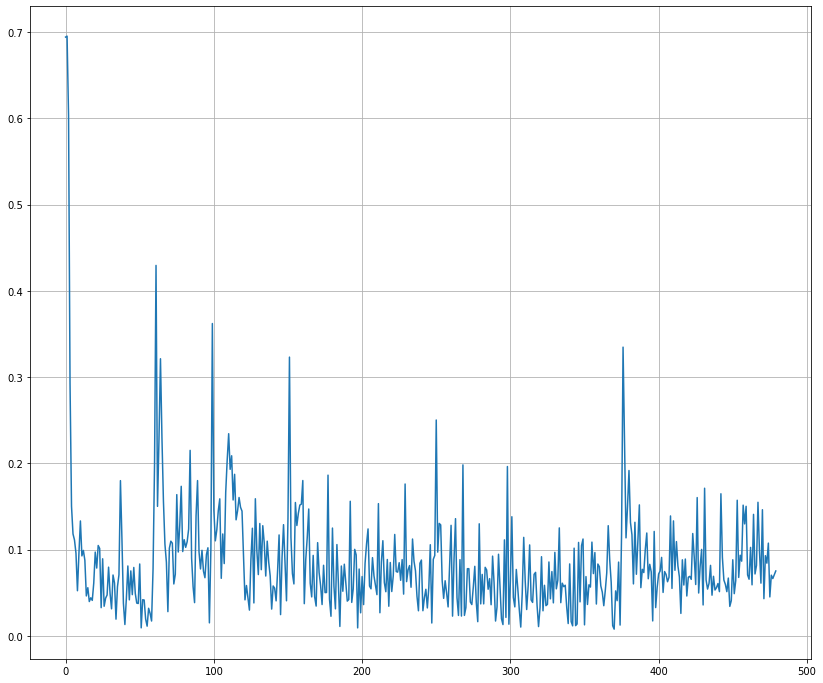

In [174]:
plt.figure(figsize=(14, 12))
plt.plot(losses)
plt.grid()

In [20]:
(np.random.rand(10, 128) @ np.random.rand(128, 784)).shape

(10, 784)

In [113]:
#losses
dl_dy.shape


(128, 1)

In [136]:
a1.shape

(128, 3)

In [115]:
(dl_dy.T @ (my_y @ (1-my_y).T)).shape

(1, 128)

In [135]:
dl_dz2.shape

(128, 3)

In [134]:
(dl_dz2.T @ a1 ).shape

(3, 3)

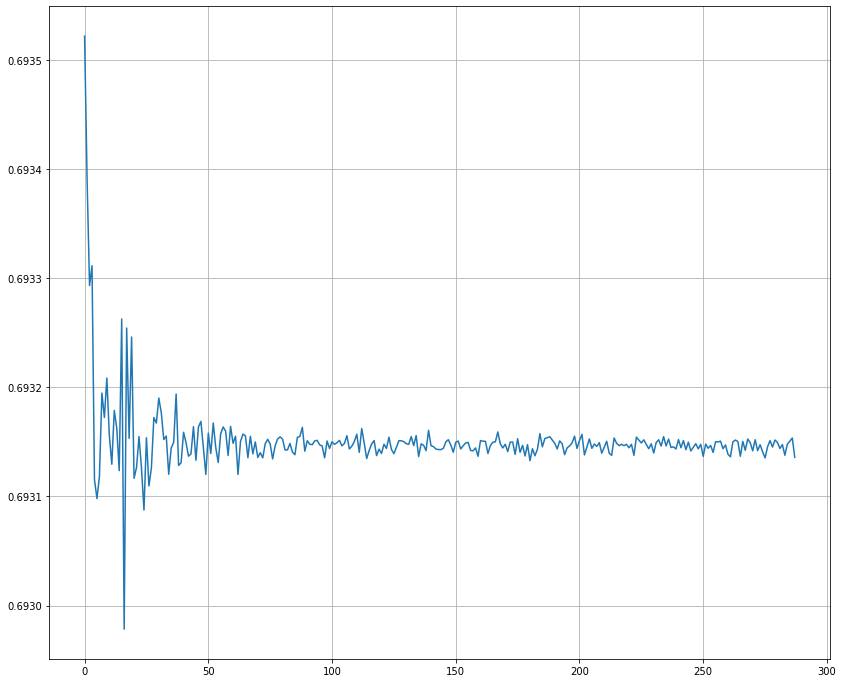

In [22]:

plt.figure(figsize=(14, 12))
plt.plot(losses)
plt.grid()

In [58]:

(dl_dy.T @ my_y*(1-my_y)).T @  x

ValueError: ignored